# Módulo: Otros Tópicos
## Algoritmos Evolutivos

# Introducción

## Motivación

<center>
    <img src="figures/dog-1.png" width="900"/>
</center>

<center>
    <img src="figures/dog-2.png" width="1100"/>
</center>

## Técnicas evolutivas
- Algoritmos genéticos
- Programación genética
- Evolución diferencial
- Programación evolutiva
- Estrategias evolutivas

<center>
    <img src="figures/genetic-2.jpg" width="400"/>
</center>

# Algoritmos genéticos

## Generalidades
Son técnicas de optimización y descubrimiento de soluciones a problemas basadas en la teoría de la evolución de las especies

<center>
    <img src="figures/genetic-1.png" width="500"/>
</center>

Reflejan el proceso de selección natural en donde los mejores individuos (soluciones) son elegidos para traspasar sus genes a la siguiente generación

Una población de potenciales soluciones a un problema (individuos) se evoluciona a través de varias generaciones para obtener mejores soluciones

<center>
    <img src="figures/genetic-gif.gif" width="800"/>
</center>

Los individuos son caracterizados por su carga genética, cromosomas o fenotipo

Nuevos individuos van surgiendo de mezclar y alterar los genes de la generación anterior.

<center>
    <img src="figures/genetic-3.png" width="700"/>
</center>

## Metodología

&#10148; Se comienza con una población aleatoria de individuos (generación inicial).

&#10148; En cada generación se evalúa la aptitud (fitness) de cada individuo mediante una función asociada al problema a optimizar.

<br><center>
    <img src="figures/genetic-5.png" width="400"/>
</center>

&#10148; Se eligen los individuos más aptos (padres) para crear una nueva generación (hijos).

&#10148; El proceso continúa creando sucesivas generaciones hasta cumplir algún criterio de convergencia para seleccionar el individuo más apto (solución final).

<br><center>
    <img src="figures/genetic-4.jpg" width="400"/>
</center>

## Operadores genéticos
Los operadores genéticos son las técnicas usadas para crear nuevos individuos a partir de los mejores individuos de una generación 

<center>
    <img src="figures/genetic-6.png" width="600"/>
</center>


**Recombinación (cross-over)**

Se mezcla información de los padres para crear hijos

<center>
    <img src="figures/crossover-1.png" width="700"/>
</center>

**Mutación**

Aleatoriamente se altera parte de los genes de los hijos

<center>
    <img src="figures/mutation-1.png" width="400"/>
</center>

## Limitaciones

- Los algoritmos genéticos no escalan bien con la complejidad de un problema, ya que comúnmente hay un incremento exponencial del tamaño del espacio de búsqueda.
- La repetiva evaluación de la función de aptitud puede ser computacionalmente costoso para problemas complejos.
- El criterio de término puede ser ambiguo, ya que las soluciones solo son mejores en comparación a las otras.
- Puede ocurrir convergencia hacia una solución de mínimo local.
- Dependiendo del problema, pueden haber otros métodos de optimización más eficientes.

## Ejemplo

Usamos un algoritmo genético para, a partir de una población de 4 puntos en el plano, acercarnos lo más posible al punto (-0.4, 0.3)

<center>
    <img src="figures/genetic-example-1.png" width="500"/>
</center>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

def fun_fitness(individual):
    return 1./np.linalg.norm(individual - np.array([-0.4, 0.3]))

def select_parents(population):
    all_fitness = np.array([fun_fitness(individual) for individual in population])
    max_fitness = np.max(all_fitness)
    
    sort_idx = np.argsort(all_fitness)
    idx_max1 = sort_idx[-1]
    idx_max2 = sort_idx[-2]
    return np.array([population[idx_max1], population[idx_max2]]), max_fitness

def crossover(parent1, parent2):
    flip = np.random.randint(2)
    if flip == 0:
        child = [parent1[0], parent2[1]]
    else:
        child = [parent2[0], parent1[1]]        
    return np.array(child)

In [12]:
def mutation(child): 
    flip = np.random.randint(4)    
    if flip == 0:
        mut_child = [child[0]*1.15, child[1]]
    elif flip == 1:
        mut_child = [-child[0]*1.15, child[1]]
    elif flip == 2:
        mut_child = [child[0], child[1]*1.15]
    else:
        mut_child = [child[0], -child[1]*1.15]
    return np.array(mut_child)

def offspring(parents, n_children):
    offspring = []
    for n in range(n_children):
        child = crossover(parents[0], parents[1])
        mut_child = mutation(child)
        offspring.append(mut_child)
    return np.array(offspring)

La mejor solución es:  [-0.40227144  0.30590229]


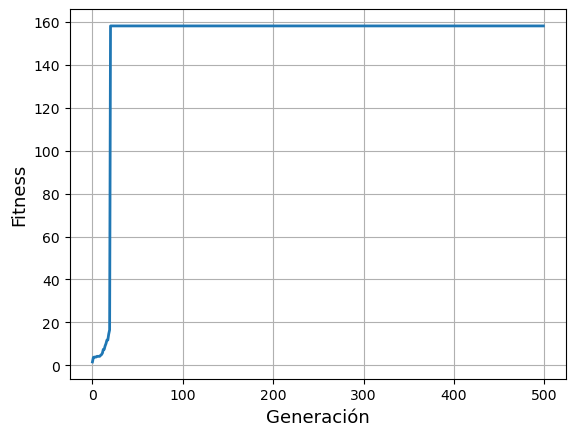

In [15]:
population = np.array([[0.1, -0.1], [0.3, 0.5], [-0.2, -0.3], [0.2, -0.5]])
n_generations = 500
scores = []
best_gen = []
for gen in range(n_generations):
    parents, max_fitness = select_parents(population)    
    scores.append(max_fitness)
    best_gen.append(parents[0])
    children = offspring(parents=parents, n_children=2)
    population = np.concatenate((parents, children), axis=0)

print('La mejor solución es: ', best_gen[-1])
     
plt.plot(scores, linewidth=2)
plt.xlabel('Generación',fontsize=13), plt.ylabel('Fitness', fontsize=13), plt.grid()
plt.show()

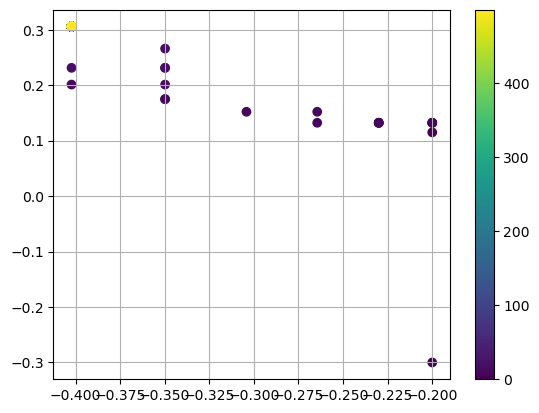

In [16]:
best_gen = np.array(best_gen)
plt.scatter(best_gen[:,0], best_gen[:,1], c=np.arange(len(best_gen)).astype(float))
plt.colorbar(), plt.grid()
plt.show()

# Aplicación: selección de hiperparámetros de clasificador

In [1]:
from sklearn.datasets import fetch_covtype
from sklearn.preprocessing import StandardScaler

covtype = fetch_covtype(as_frame=True)
X = covtype.data
y = covtype.target
X.insert(0, "target", y)
display(X) #set de datos

,target,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,5,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,3,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581008,3,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581009,3,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581010,3,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
solvers_ = ['lbfgs', 'sgd', 'adam']
activations_ = ['tanh', 'logistic', 'relu']
alphas_ = [1.e-4, 1.e-1, 1.e2]
hidden_layer_sizes_ = [(50,), (100,), (10,)]
max_iters_ = [1000, 5000, 10000]

def gen_sample():
    flip = np.random.randint(3, size=5)
    return (solvers_[flip[0]], activations_[flip[1]], alphas_[flip[2]], hidden_layer_sizes_[flip[3]], max_iters_[flip[4]])

def gen_population(n_samples):
    return [gen_sample() for i in range(n_samples)]

In [9]:
def fun_fitness(data, labels, hparams):
    clf = MLPClassifier(solver=hparams[0], activation=hparams[1], alpha=hparams[2], hidden_layer_sizes=hparams[3], max_iter=hparams[4], random_state=0)
    cv = cross_validate(estimator=clf, X=data, y=labels, cv=2, scoring='accuracy')
    return np.mean(cv['test_score'])

def select_parents(data, labels, population):
    all_fitness = np.array([fun_fitness(data, labels, hparams) for hparams in population])
    max_fitness = np.max(all_fitness)
    idx1 = np.argmax(all_fitness)    
    all_fitness[idx1] = -999
    idx2 = np.argmax(all_fitness)
    return [population[idx1], population[idx2]], max_fitness

def crossover(parent1, parent2):
    flip = np.random.randint(3)
    if flip == 0:
        child = (parent1[0], parent1[1], parent2[2], parent2[3], parent2[4])
    elif flip == 1:
        child = (parent2[0], parent2[1], parent1[2], parent1[3], parent1[4])
    elif flip == 2:
        child = (parent1[0], parent2[1], parent1[2], parent2[3], parent1[4])
    return child

In [8]:
def mutation(child): 
    mut_child = list(child)
    flip = np.random.randint(5)
    if (flip == 0) or (flip == 1):
        mut = gen_sample()
        mut_child[flip] = mut[flip]
    elif flip == 3:
        foo = int(mut_child[flip][0]*(np.random.uniform(-0.2, 0.2)+1))
        mut_child[flip] = (foo,)
    elif flip == 4:
        mut_child[flip] = int(mut_child[flip]*(np.random.uniform(-0.2, 0.2)+1))
    else:
        mut_child[flip] = mut_child[flip]*(np.random.uniform(-0.2, 0.2)+1)
    return tuple(mut_child)

def offspring(parents, n_children):
    offspring = []
    for n in range(n_children):
        child = crossover(parents[0], parents[1])
        mut_child = mutation(child)
        offspring.append(mut_child)
    return offspring

In [6]:
from sklearn.model_selection import train_test_split

covtype = fetch_covtype(as_frame=False)
X = covtype.data[:1000]
y = covtype.target[:1000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=11)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
ini_population = gen_population(n_samples=4)
print(ini_population)

[('sgd', 'tanh', 0.0001, (100,), 5000), ('lbfgs', 'tanh', 0.1, (50,), 5000), ('lbfgs', 'relu', 0.1, (10,), 1000), ('adam', 'logistic', 100.0, (50,), 1000)]


In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

parents, max_fitness = select_parents(data=X_train, labels=y_train, population=ini_population)
print(parents[0])
print(max_fitness)

C:\Users\felea\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\felea\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


('lbfgs', 'tanh', 0.1, (50,), 5000)
0.74


In [13]:
n_generations = 10
scores = []
for g in range(n_generations):
    if g == 0:
        parents, max_fitness = select_parents(data=X_train, labels=y_train, population=ini_population)
    else:
        parents, max_fitness = select_parents(data=X_train, labels=y_train, population=population)
    scores.append(max_fitness)
    children = offspring(parents=parents, n_children=2)  
    population = children + parents

C:\Users\felea\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\felea\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


('lbfgs', 'tanh', 0.1, (45,), 4451)
0.75


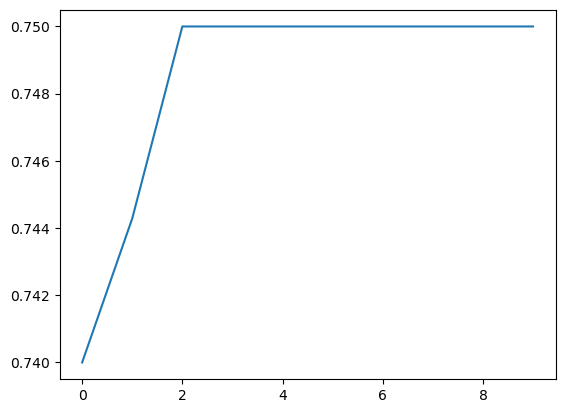

In [14]:
print(parents[0])
print(max_fitness)
plt.plot(scores)
plt.show()

# Sumario
- Los algoritmos evolutivos están inspirados por la teoría de la evolución, en donde se van eligiendo individuos más aptos en sucesivas generaciones.
- Los algoritmos genéticos emplean operaciones de recombinaciones y mutaciones para ir generando nuevas posibles soluciones a un problema a partir de una población inicial de soluciones.
- Aplicado al aprendizaje automático, los algoritmos genéticos pueden emplearse para la búsqueda de los hiperparámetros de un modelo.